## Content


Logistic Regression-2 

9. Scratch code for implementation 
10. Accuracy 
11. Log-odds 
12. Multi-Class (one vs all)
13. Impact of Outliers
14. Churn Prediction implement 



#Scratch Code for Optimization  

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Hypothesis function and sigmoid 

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


def hypothesis(X, weight):
    """
    X - np array (m,n)
   weight - np arrary (n, 1)
    """
    return sigmoid(np.dot(X, weight))


Cost function

In [ ]:
def error(X, y, weight):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        weight - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    model = hypothesis(X, weight)
    err = np.mean((y*np.log(model) + (1-y)*np.log(1 - model)))
    
    return -err



Optimisation using Gradient descent

In [ ]:
def gradient(X, y, weight):
    """
    X - (m,n)
    y - (m,1)
    weight - (n,1)
    
    return - (n, 1)
    """
    model = hypothesis(X, weight)
    grad = (np.dot(X.T, (model - y)))
    return grad/X.shape[0]



def gradient_descent(X, y, lr = 0.5, max_iter = 30):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, weight)
        error_list.append(e)
        
        grad = gradient(X, y, weight)
        
        #Update Rule
        weight = weight - lr*grad
    
    return (weight, error_list)
    


Creating some data for simplicity 
- Since real world problems are more tricky and lots of EDA are required 

In [ ]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


Weights of the model 

In [ ]:
weight = np.zeros((X.shape[1], 1))
weight

array([[0.],
       [0.]])

Plotting the data 

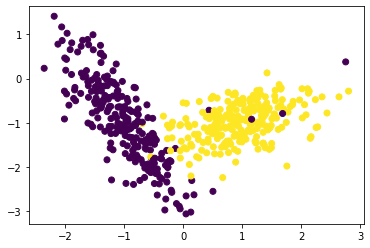

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Adding bias term

In [ ]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]
X_.shape

(500, 3)

Splitting the data into train and test
- To test the model on unseen data

In [ ]:
from sklearn.model_selection import train_test_split


# reserving 20% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
opt_weight, error_list = gradient_descent(X_train, y_train)

Checking the learned parameters and loss

In [ ]:
##learned parameters
opt_weight

array([[0.11877655],
       [2.30509204],
       [0.11405031]])

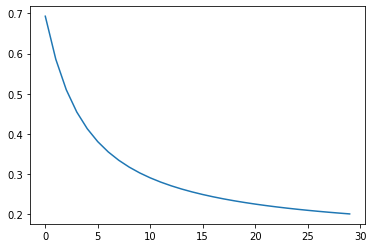

In [ ]:
plt.plot(error_list)

Plotting the Hyperplane that best separates the original data

In [ ]:
##generating points to plot the learned line
x1 = np.array([-1, 1])
x2 = - (opt_weight[0] + opt_weight[1]*x1) / opt_weight[2]
print(x2)

[ 19.16974639 -21.25262639]


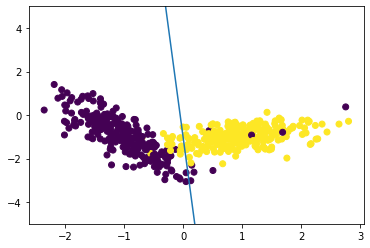

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.ylim((-5,5))
plt.plot(x1, x2)
plt.show()




### Big Picture 

 Let's see all the steps together
 0. The data we have here, n samples with $x_i$ and $y_i$ such that $y_i$ have value either 0 or 1

 1. For classification of data, we need a  linear seperator hyperplane i.e $w^Tx_i+w_0$

 2. Since $z_i = w^Tx_i+w_0$ ranges from $(-∞,∞)$, we squashed the $z_i$ values between 0 and 1 using sigmoid function. 
    - These values between 0 and 1,  can also be seen as a probability of $y_i=1$ given $x_i$

 3. After that we want to compare $y_i$ and $y_î$ and why log-loss works 
 4. Then we defined how our cost function looks and why regularisation is needed 
 5. As covered in Linear Regression, hyper parameter tuning for over-fitting and under-fitting trade off, in order to find the best model. 
    - The hyper parameter here is $λ$ or regularization parameter.
 

<img src='https://drive.google.com/uc?id=1V59eCP7m-y21_gZ8QY4xsBMvGG8LHXff'>



<img src='https://drive.google.com/uc?id=1J51riAC25oXNe7GHId0_0nGyD1BWB-Ms'>


# **Performance - Accuracy Metric**

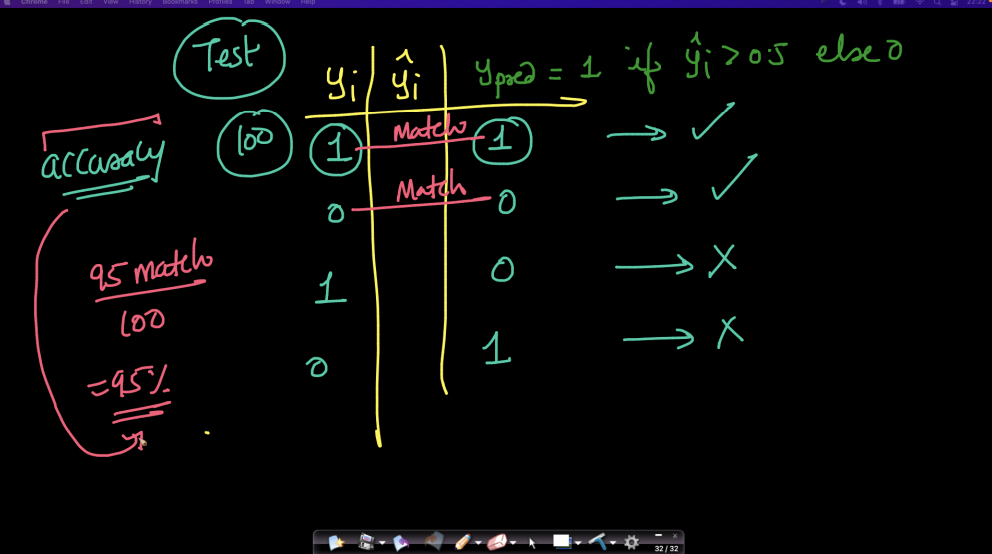

## **How  can we say, that the model we have got is the best one ?**
- Recall how we used threshold after we find $y_i$ so it has values either 0 or 1. Lets call it $y_pred$ 

- Now for accuracy metrics, we use a simple concept of how many times $y_i$ and $y_{pred}$ matches.

lets take an example:
- Supposedly we consider 0.5 as threshold 
- $y_{pred} = 1 $ if $y_î > 0.5$ else 0
- Now, if we had 100 samples on our test data
    - accuracy finds where $y_i$ has the same value as $y_{pred}$

- Now if there are 95 matches out of 100 samples , then accuracy = $\frac{95}{100}*100 = 95%$ 

Lets get back to our scratch code implemented model and check how it performed on our test data. 


Plotting test data

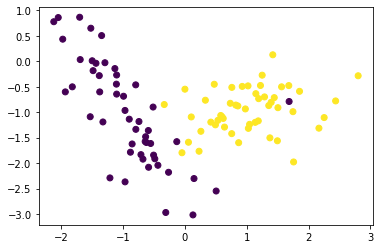

In [ ]:
plt.scatter(X_test[:, 1], X_test[:,2], c = y_test)
plt.show()


creating $y_{pred}$

In [ ]:
y_pred  = np.round(hypothesis(X_test, opt_weight)).astype('int')
print(y_pred.shape,y_test.shape)

(100, 1) (100, 1)


How good is our model? - Evaluation using accuracy metric

In [ ]:
def accuracy(y_test, y_pred):
    return (y_pred == y_test).mean()

In [ ]:
accuracy(y_test, y_pred)

0.94

# **Log-odds interpretation**

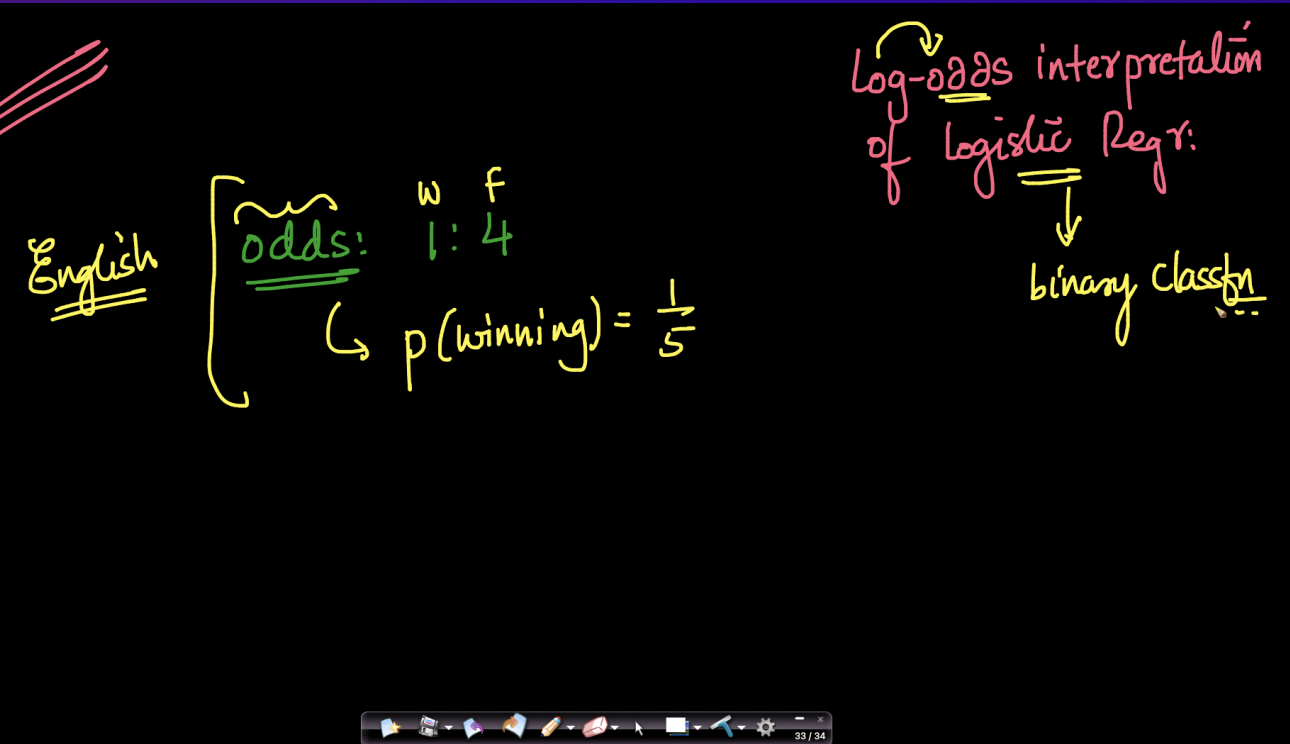

Before we start lets understand what is odds with simple example
- Supposedly we are in a casino and our betting on a number 
- and the odds of winning is 1:4, which means for every one win, i most likely am losing 4 times

#### What will be the probability of me winning the game ?
- p(winning) = 1/5


Now that we understand what odds are, lets see what log-odds are and what  significance does it plays

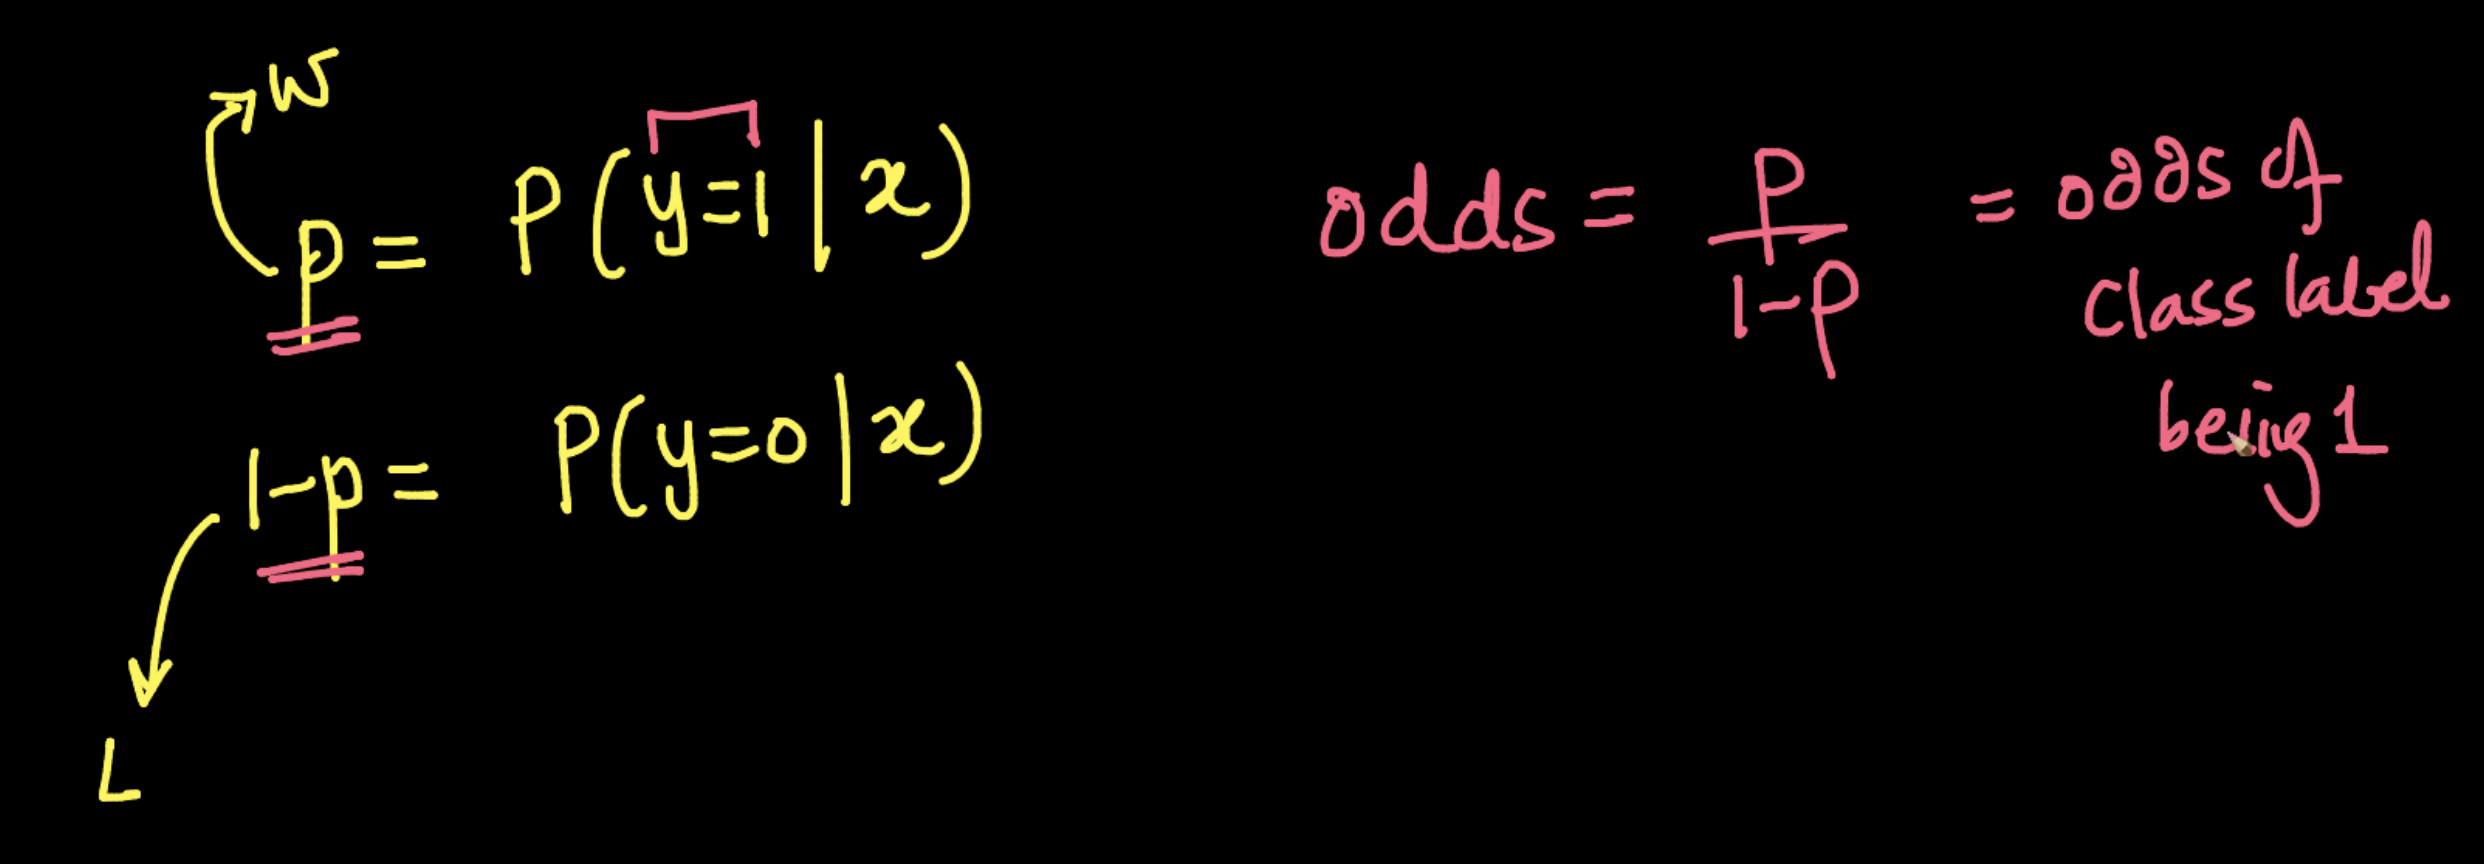

we have discussed how $y_î$ is probability of $y_i = 1$ given x 
- lets say $y_î = p = P(y_i=1|x_i)$

#### What should 1-p signify ?
- probability of $y_i = 0$ given x

#### then what can be the odds formulated ?
- odds = p/1-p
- which means the odds of $y_i$ being 1 



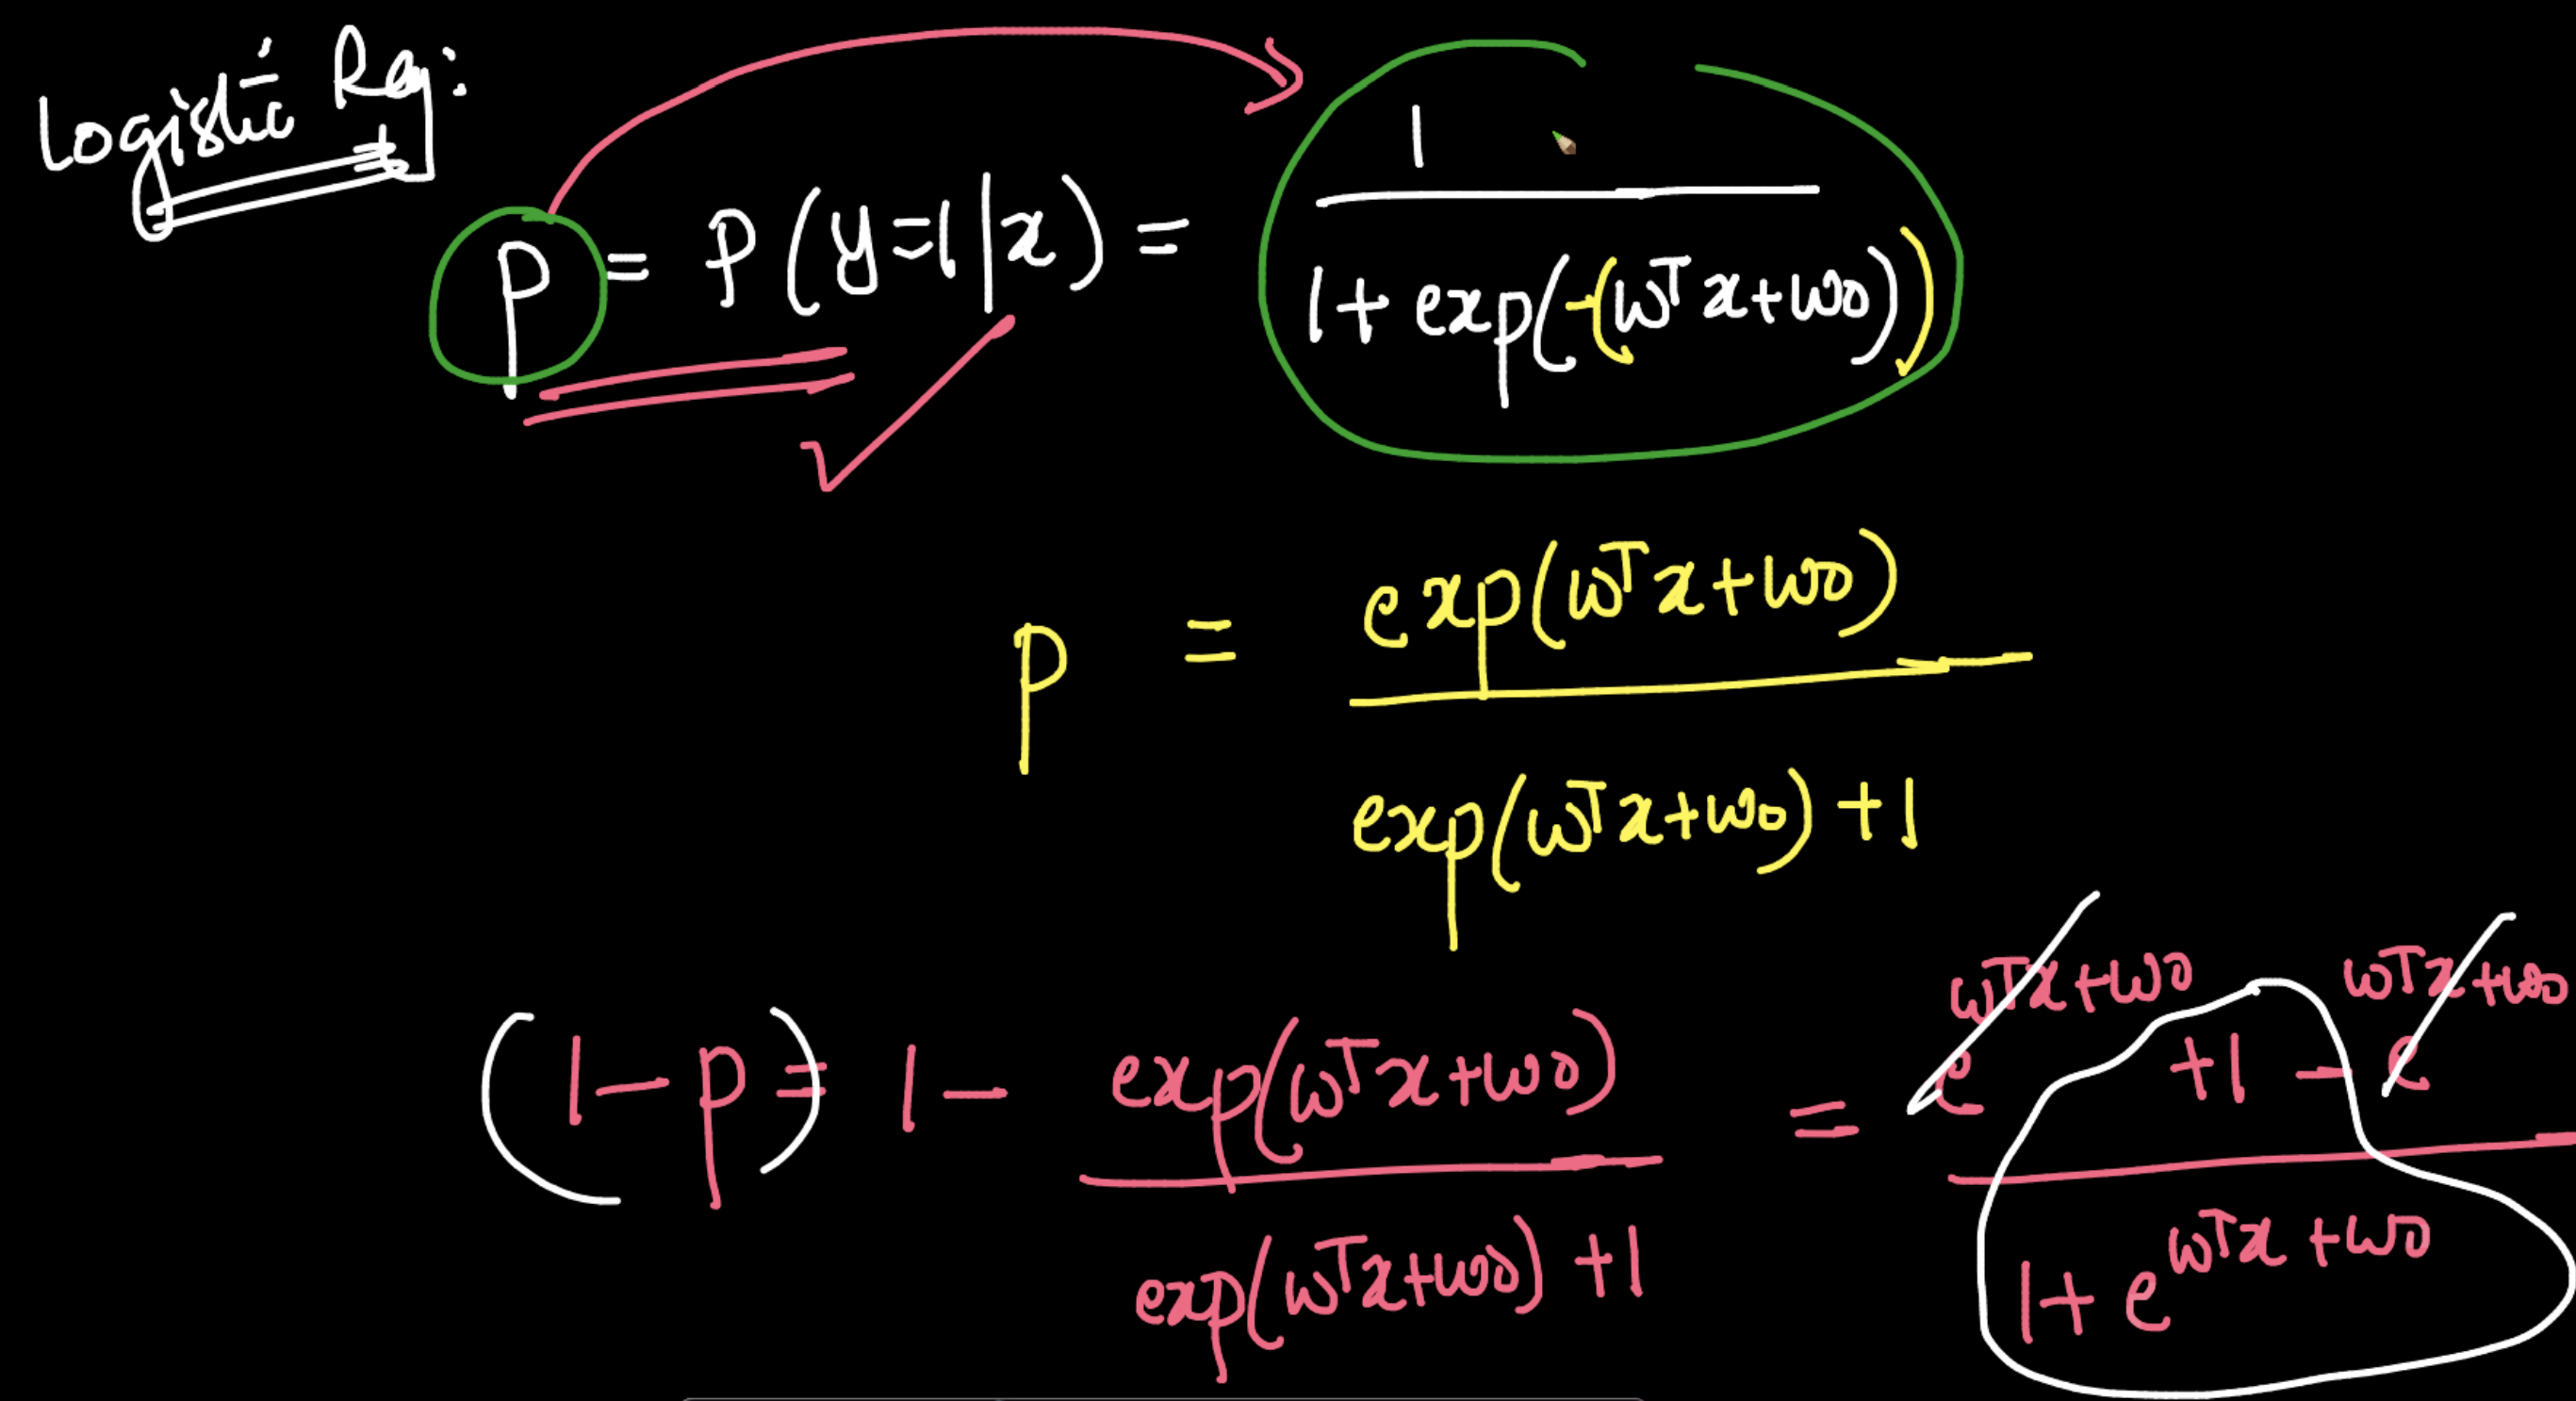

- we know how $y_î$ is $σ(w^Tx_i+w_0)$
hence we can say 
- $p =\frac{1}{1+e^{-(w^Tx_i+w_0)} } $

remember how $u^{-w}  = \frac{1}{u^w}$

Now on simplyfing the equation , we get

- $p = \frac{e^{(w^Tx_i+w_0)}} {e^{(w^Tx_i+w_0)}+1 }$

#### What about 1-p ?
- $1-p = 1 - \frac{e^{(w^Tx_i+w_0)}} {e^{(w^Tx_i+w_0)}+1 }$

On taking the LCM and simplyfing, we get
- $1-p = \frac{1} {e^{(w^Tx_i+w_0)}+1 }$






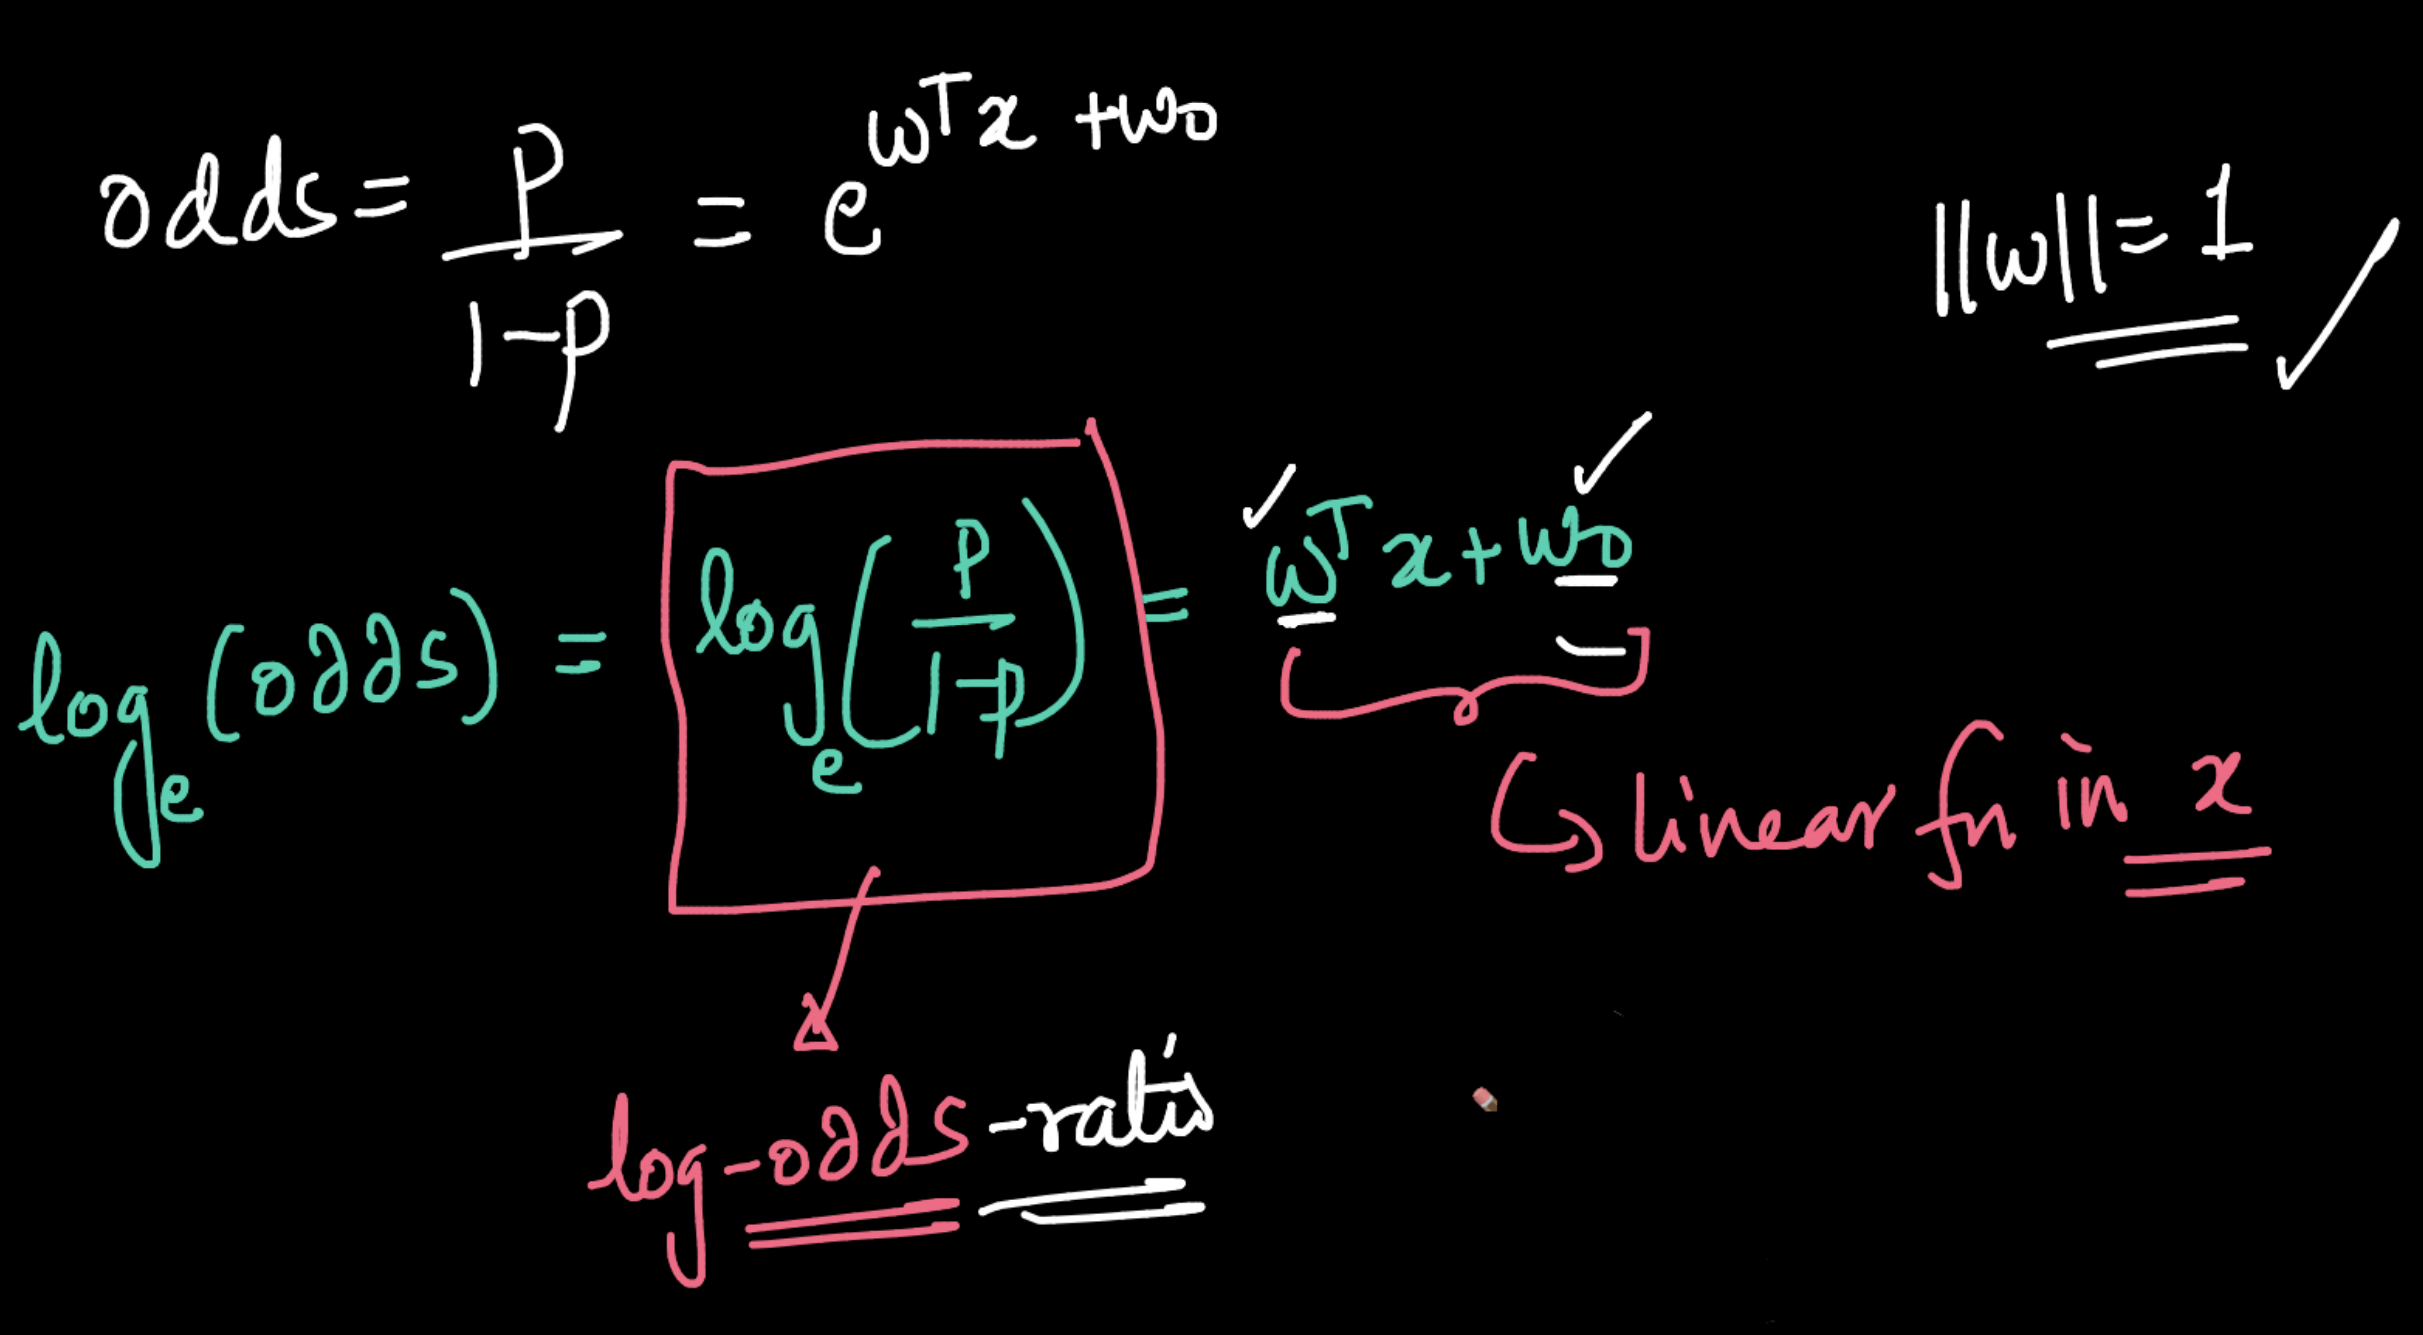

Now the odds for Logistic Regression becomes 
- $odds = \frac{p}{1-p} = e^{(w^Tx_i+w_0)} $

taking log with base e on both sides,
- since $log_a a = 1$

therefore 
- $log_e(odds) = log_e(\frac{p}{1-p}) = w^Tx_i + w_0 $

#### What does the log-odds being a linear function mean ?

- Logistic Regression Model is similar to a linear model which is predicting log-odds of $y_i=1$ vs $y_i=0$.



# **One vs All** 

We know how logisitc Regression works for binary classification tasks where 
- $y_i$ belongs to either 0 or 1

#### But what if we have more than two ways to classify our data ? 
- for Example in the fish sorting 
    - X being features of fishes such as height, weight, fin size, body size
    - Y can now be Whale, Tuna and Shark

- Now this becomes a multi-class problem, where the $y_i$ have more than 2 discrete values. 
    - $y_i$ = {$1,2,3,.....K$}  where K>2

But Logisitic Regression is a binary classifier 

#### Is there a way to convert Multi-class problem to a binary class ?
- if we have $y_i = {1,2,3...K}$ in the  dataset, we have to generate the K-binary classifier models.

lets understand this with the fish sorting example 



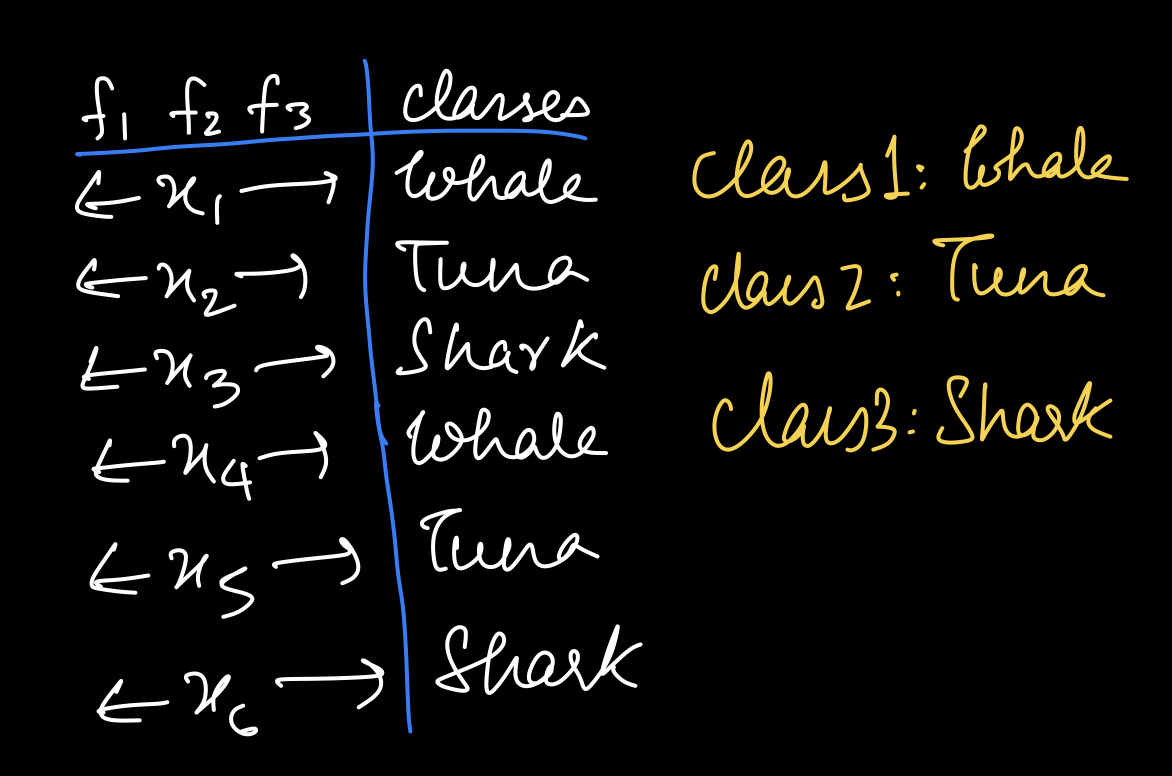

- we have 3 features of fish which are used to classify fish  y = {Whale, Tuna, Shark }

- Now, we will have 3  Logisitic Regression models: 
 - Logisitic Regression model-1:- [Whale] vs [Tuna, Shark]
 - Logisitic Regression model-2:- [Tuna] vs [Whale, Shark]
 - Logisitic Regression model-3:- [Shark] vs [Whale, Tuna]


#### Case for Logisitic Regression model-1: 



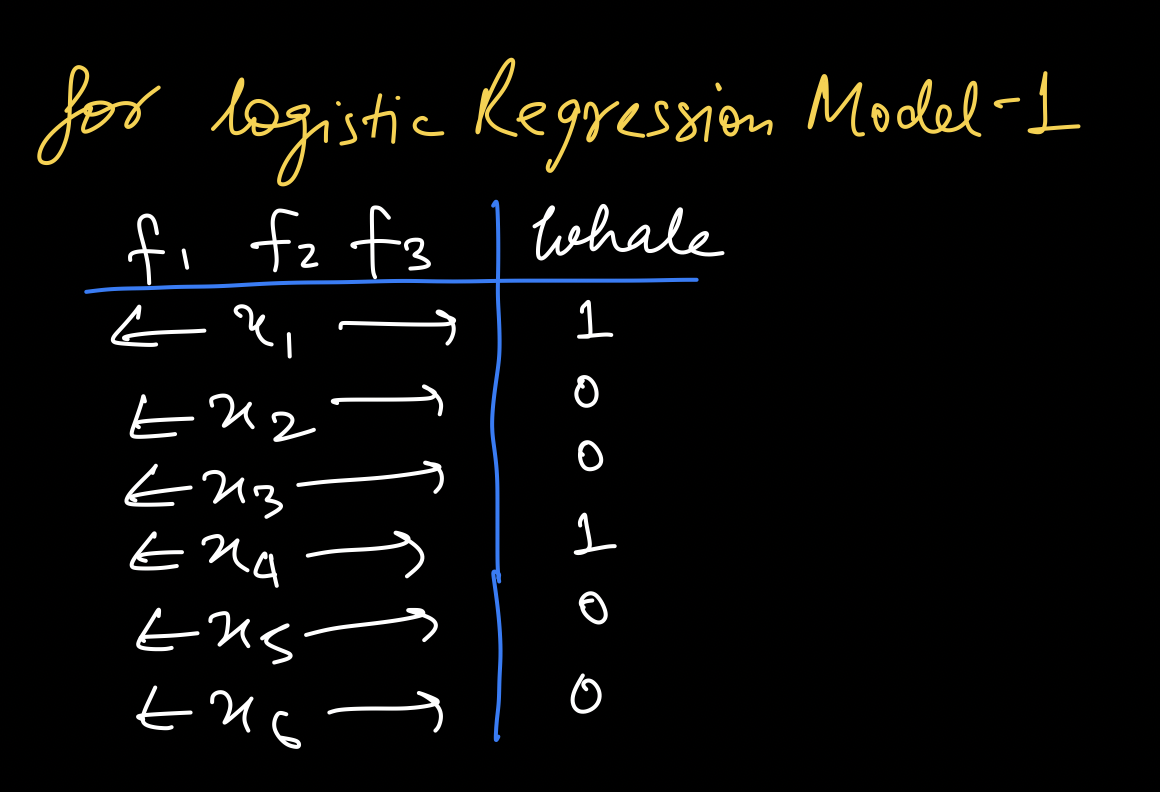

#### How can we Modify the data to make it a binary classification task ?  
- replacing Y = Whale, with Y =  +1 
- and Else Y = 0

- Now we train the Logisitic Regression model-1 on this modified data

We do the similar relevant data modification for the remaining two Logistic Regression models.

#### Question: How will be doing the data modification for Tuna and Shark ?


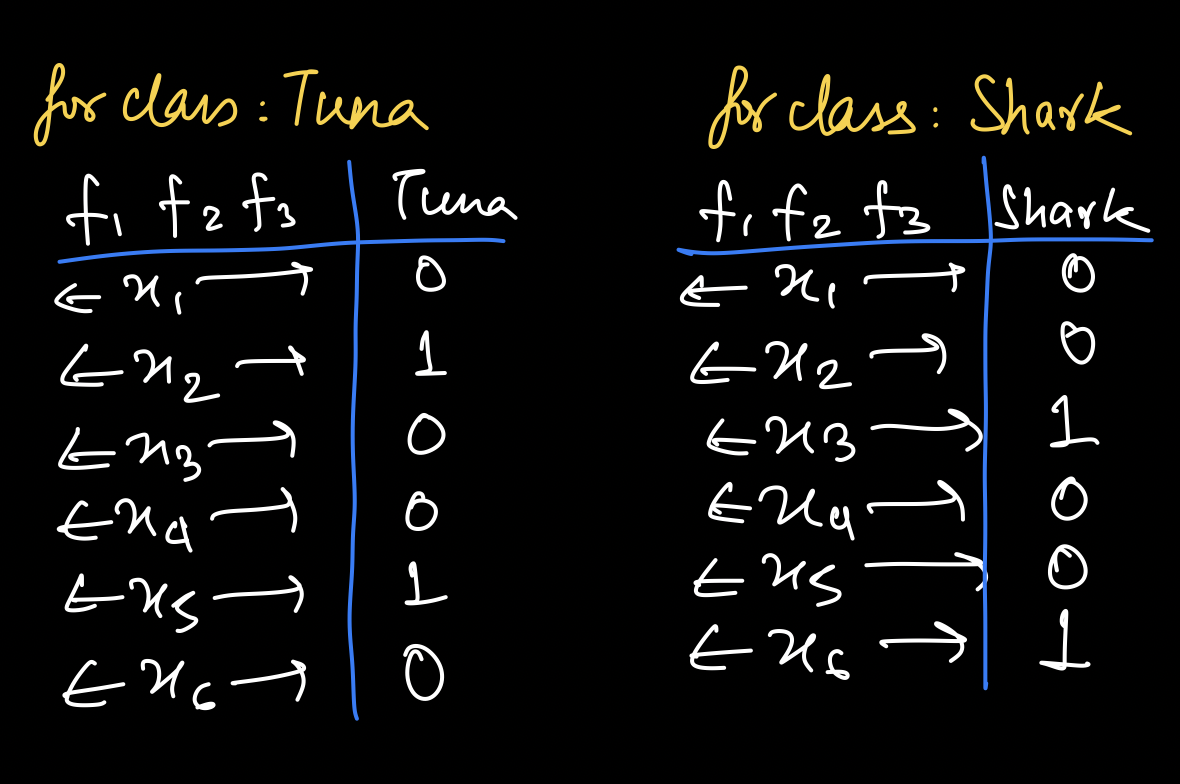

for Tuna:
- Replacing Y = Tuna with +1 and remaining with 0

For Shark:
- Replacing Y = Shark with +1 and remaining with 0



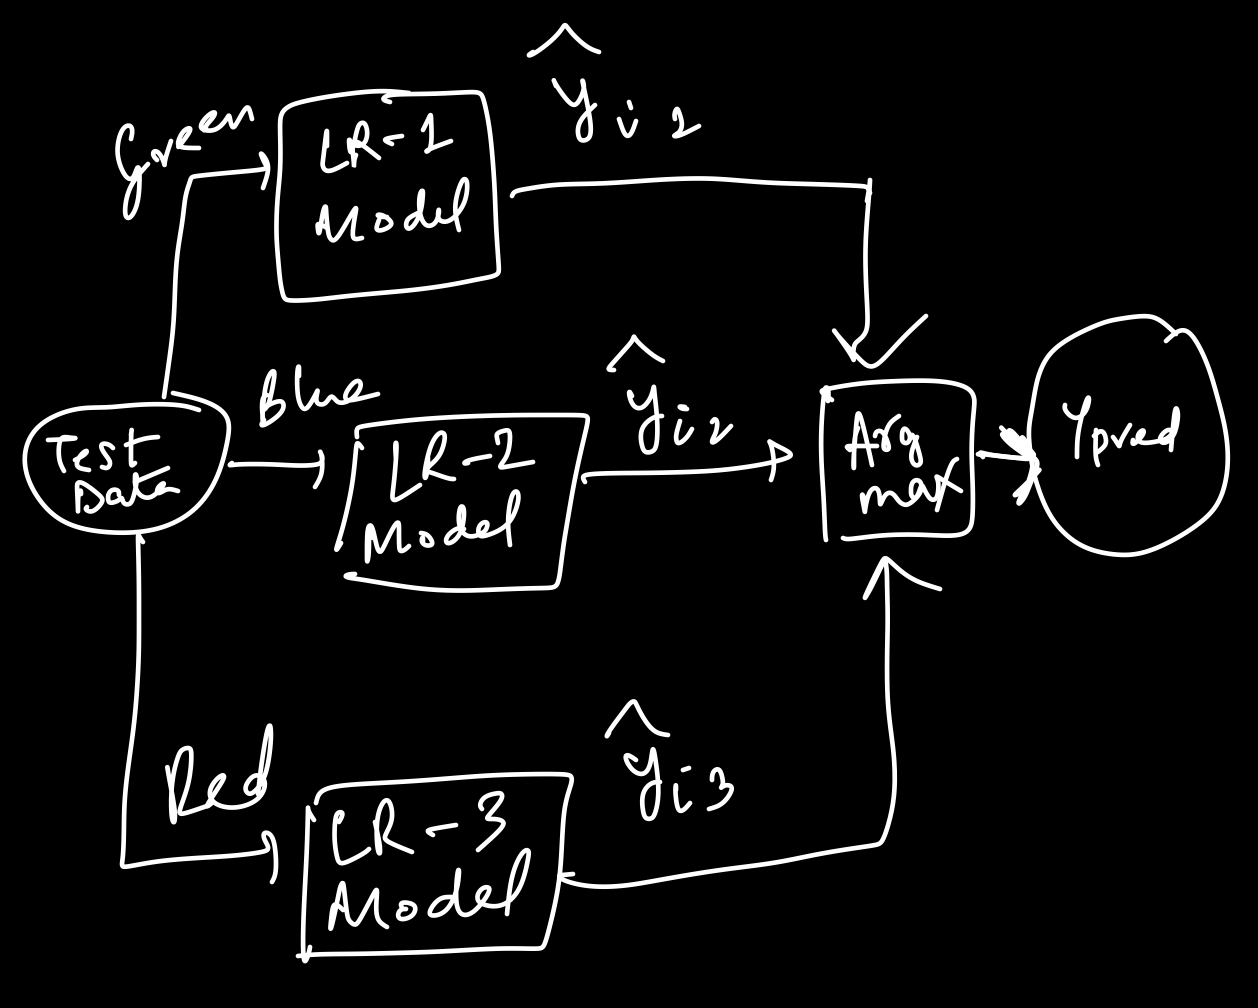

After Training these 3 models, 
- we take predictions for each of the Logistic Regression models, 
- and perform an argmax operation to get the final prediction.

But why Argmax ?
- Argmax returns the index of the value of the highest number 
- Hence if Y=Whale, then only the Logisitic Regression model-1 will have a +1 value 
- while the remaining models predicts 0. 
- This will let us know that the final prediction comes from which Logistic Regression model and hence we can conclude what value of $Y$ will be given the features x 

#### **Question: What if the K value is very large, will creating K Logistic Regression model be a right approach?**
Ans: No, Hence we use a function SoftMax for multi-class classification which will be taught in Later when we will be studying about Neural Networks


# **Impact of outliers**



#### Does Outliers have any effect on our Logistic Regression Model ?




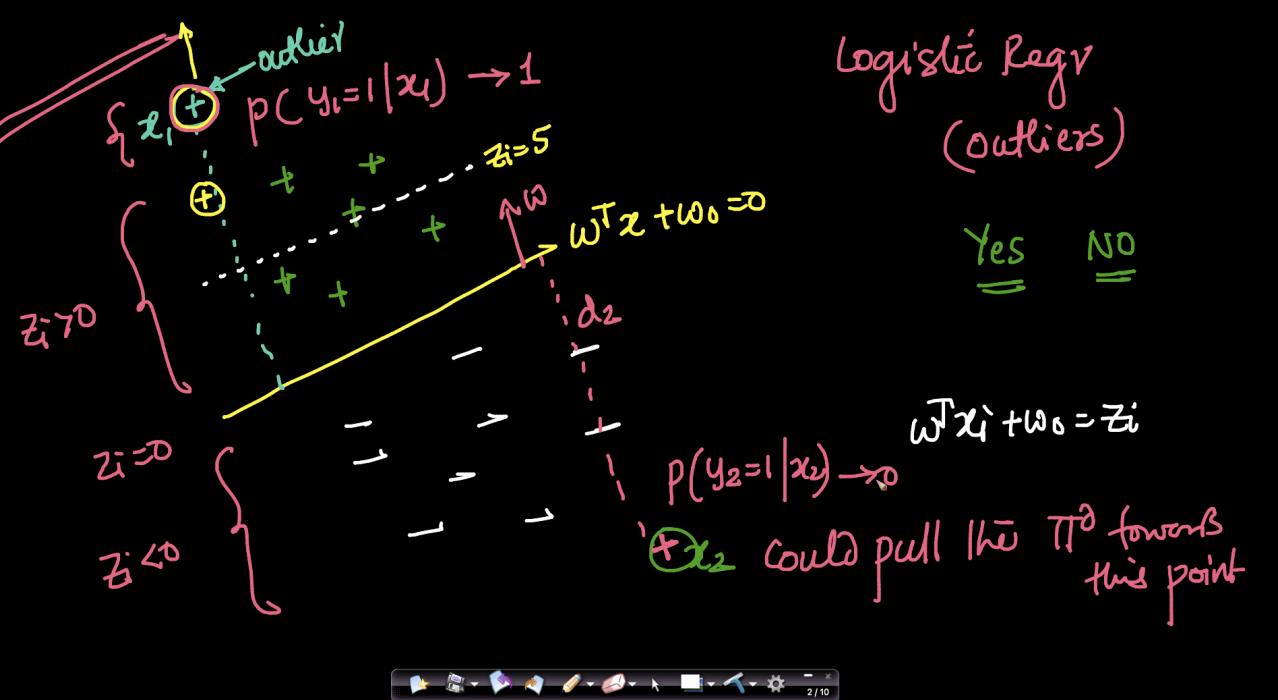

- Let's assume that we have hyperplane $w^Tx+w_0$ with $z_i=0$ or $σ(z_i)=0.5$
- Now lets assume we have an outlier with $Y=1$ belonging to the when $z_i>0$
    - is that, the outlier $x_1$, which  has $z_i>0$ 
    - Case when we have a +ve outlier on the correct side of the hyperplane

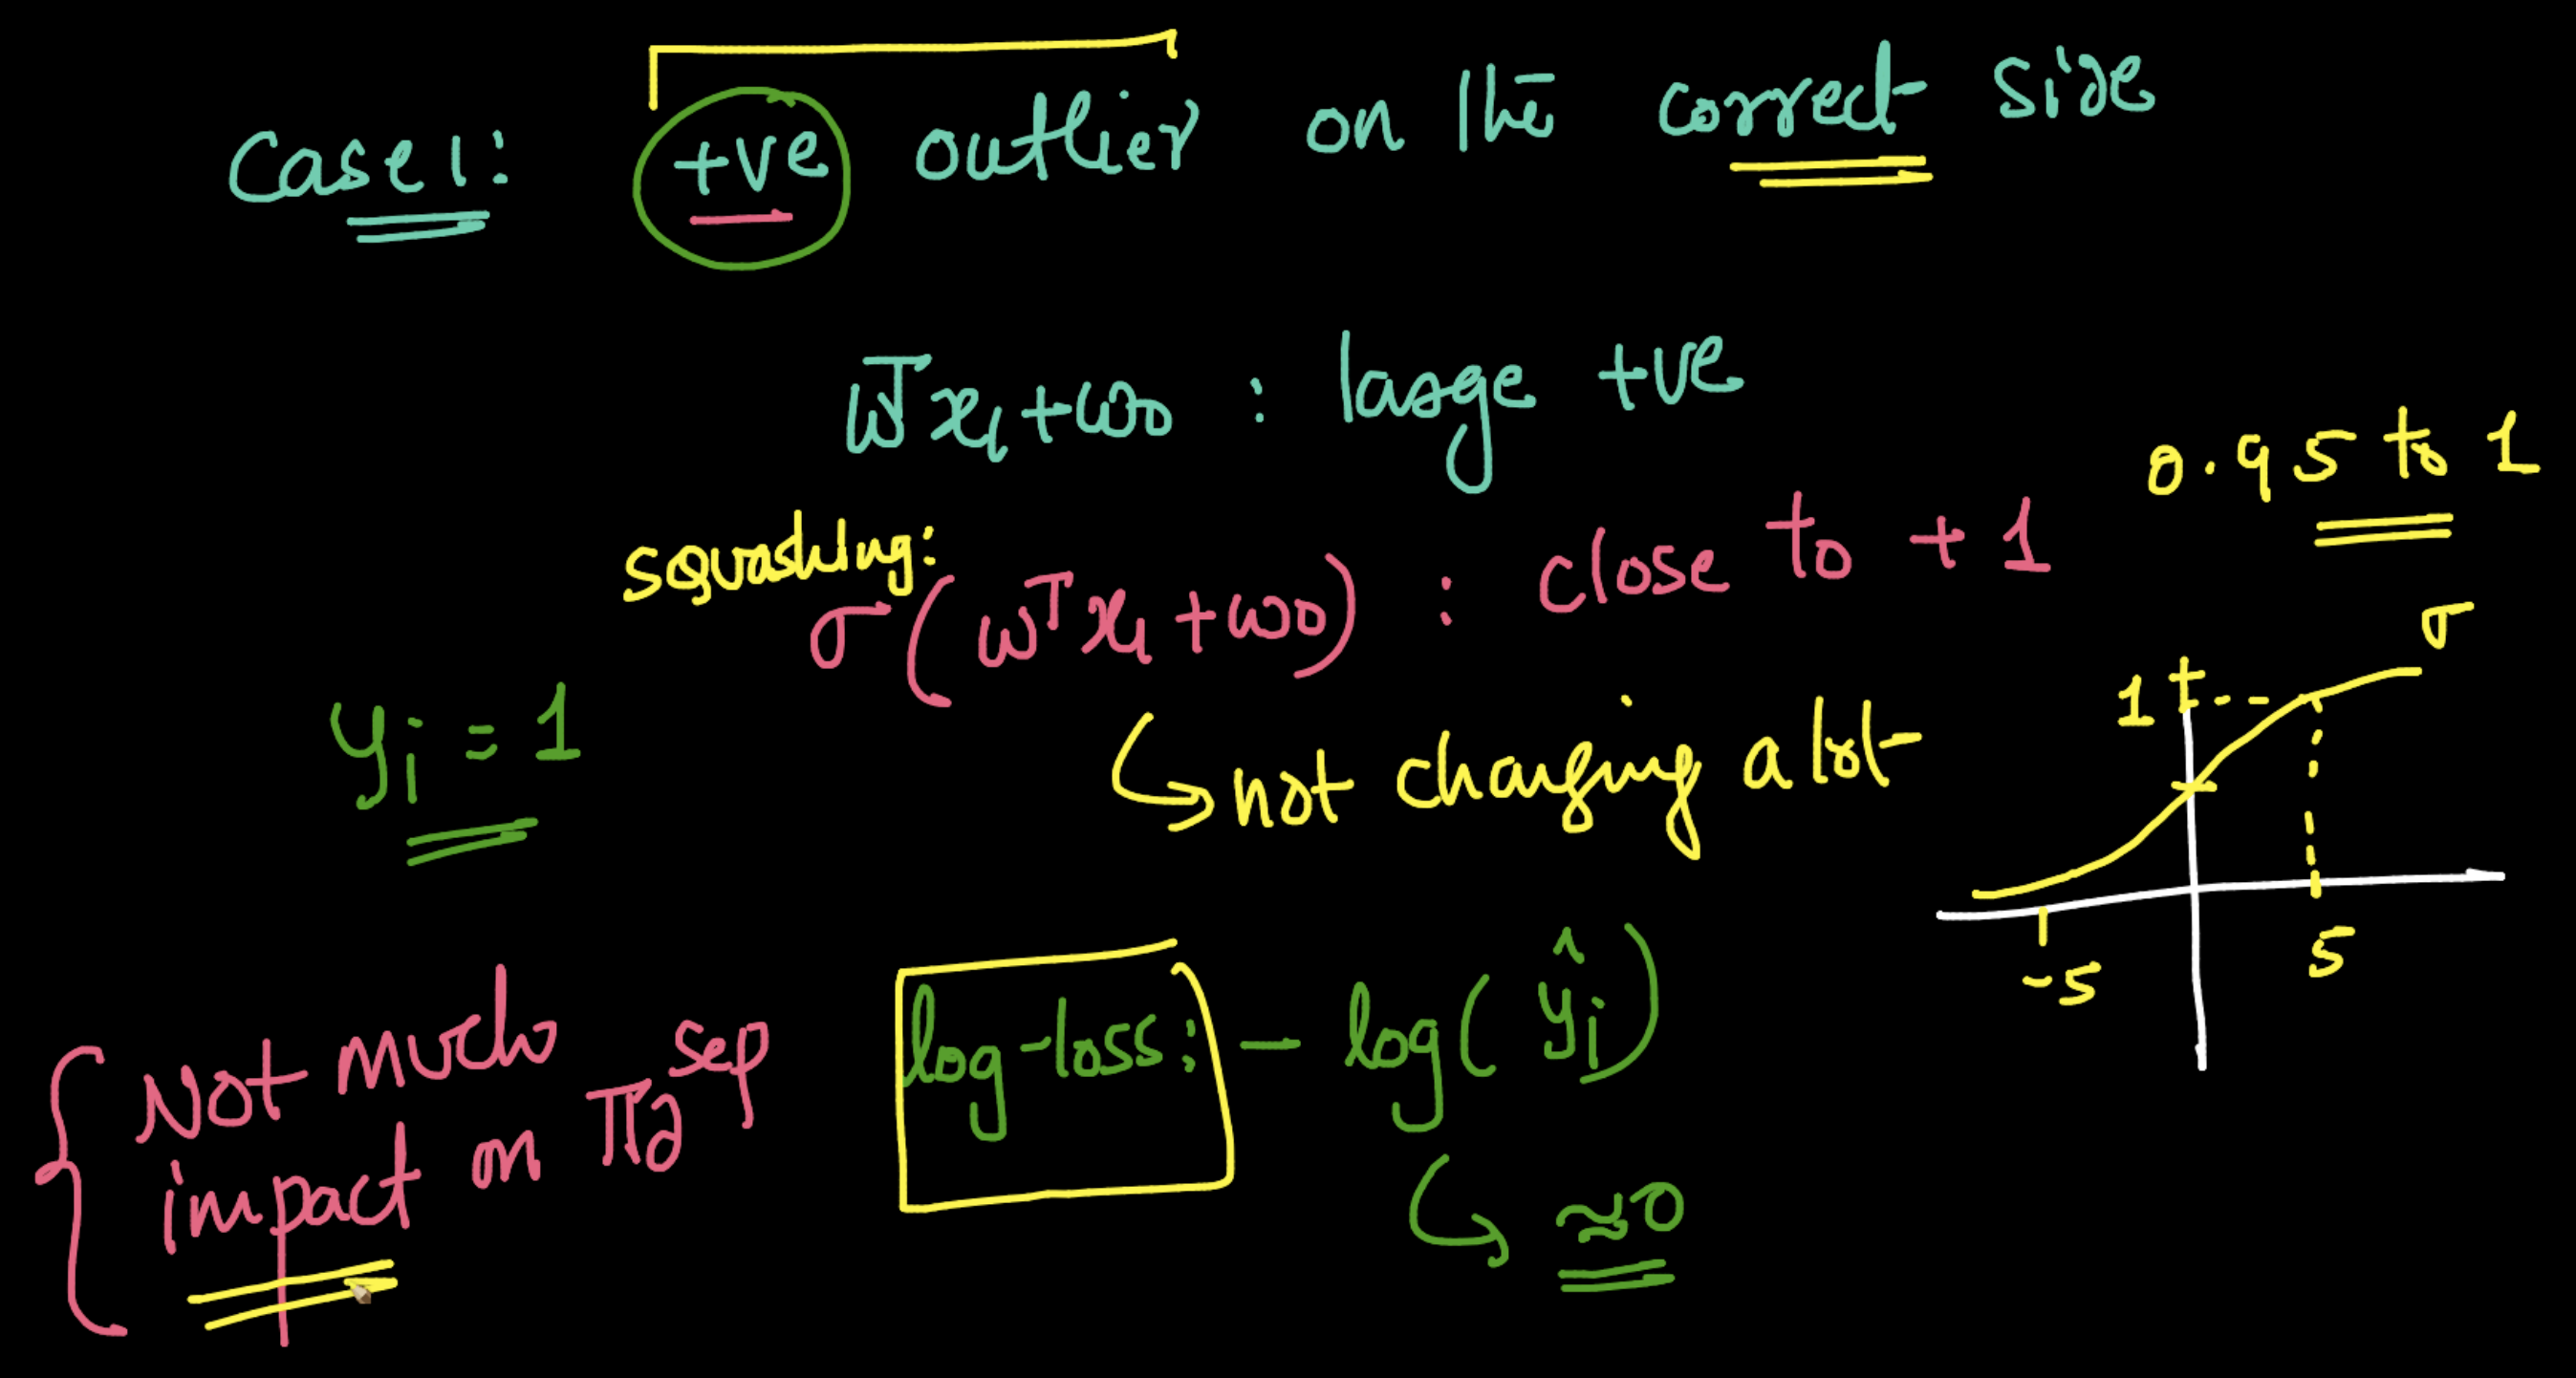

- Recall how Sigmoid value does not change alot after a certain point. 
    - Lets assume here that point is when $z_i = 5 $

- Which implies that there will not be much change in the Sigmoid value of the outliers as compared to  the rest of the data.

- Now for our log-loss for y=1 will be $-log(y_î)$,  we know how $σ(z_i)$ gets very close to 1 for high value of $z_i$, 
- and we also know log(1) = 0. 
- Hence Log-loss tends to zero for outlier value, causing zero to negligible effects on the weights of the model.

- Thus not impacting the hyperplane at all




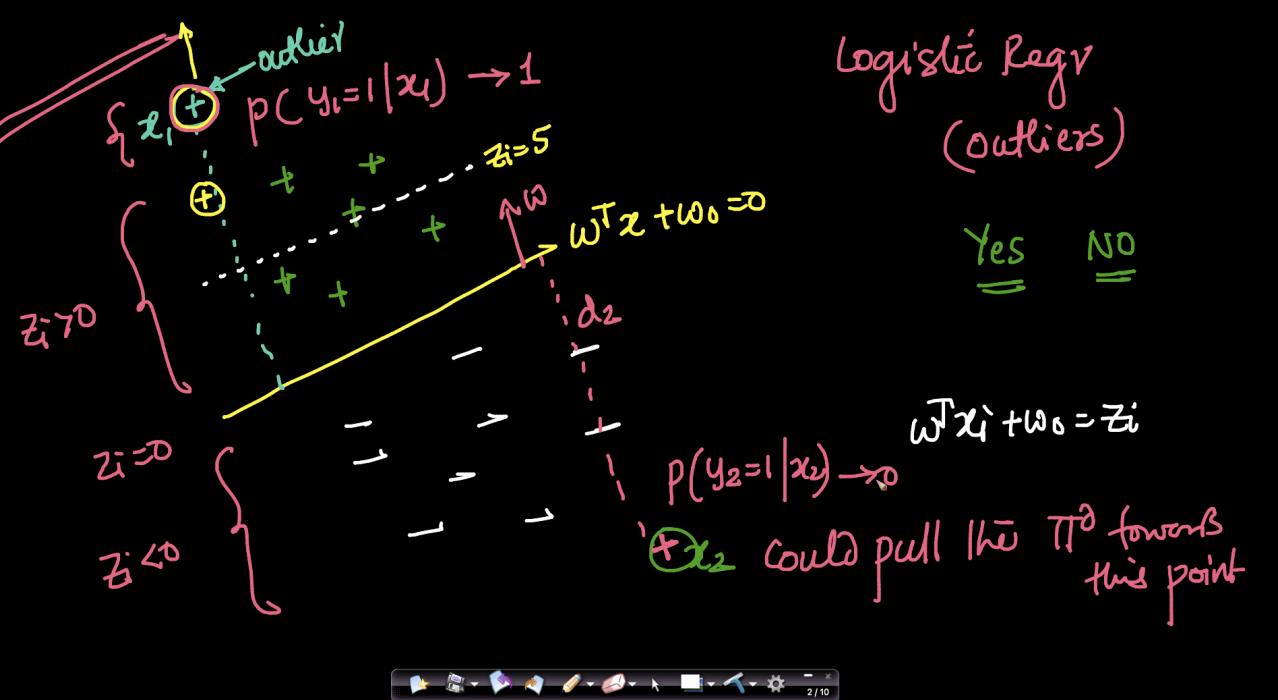

- Now lets assume we have another $Y=1 $ or +ve outlier but its $z_i<0$ which makes it lie on the wrong side. ofthe hyperplane

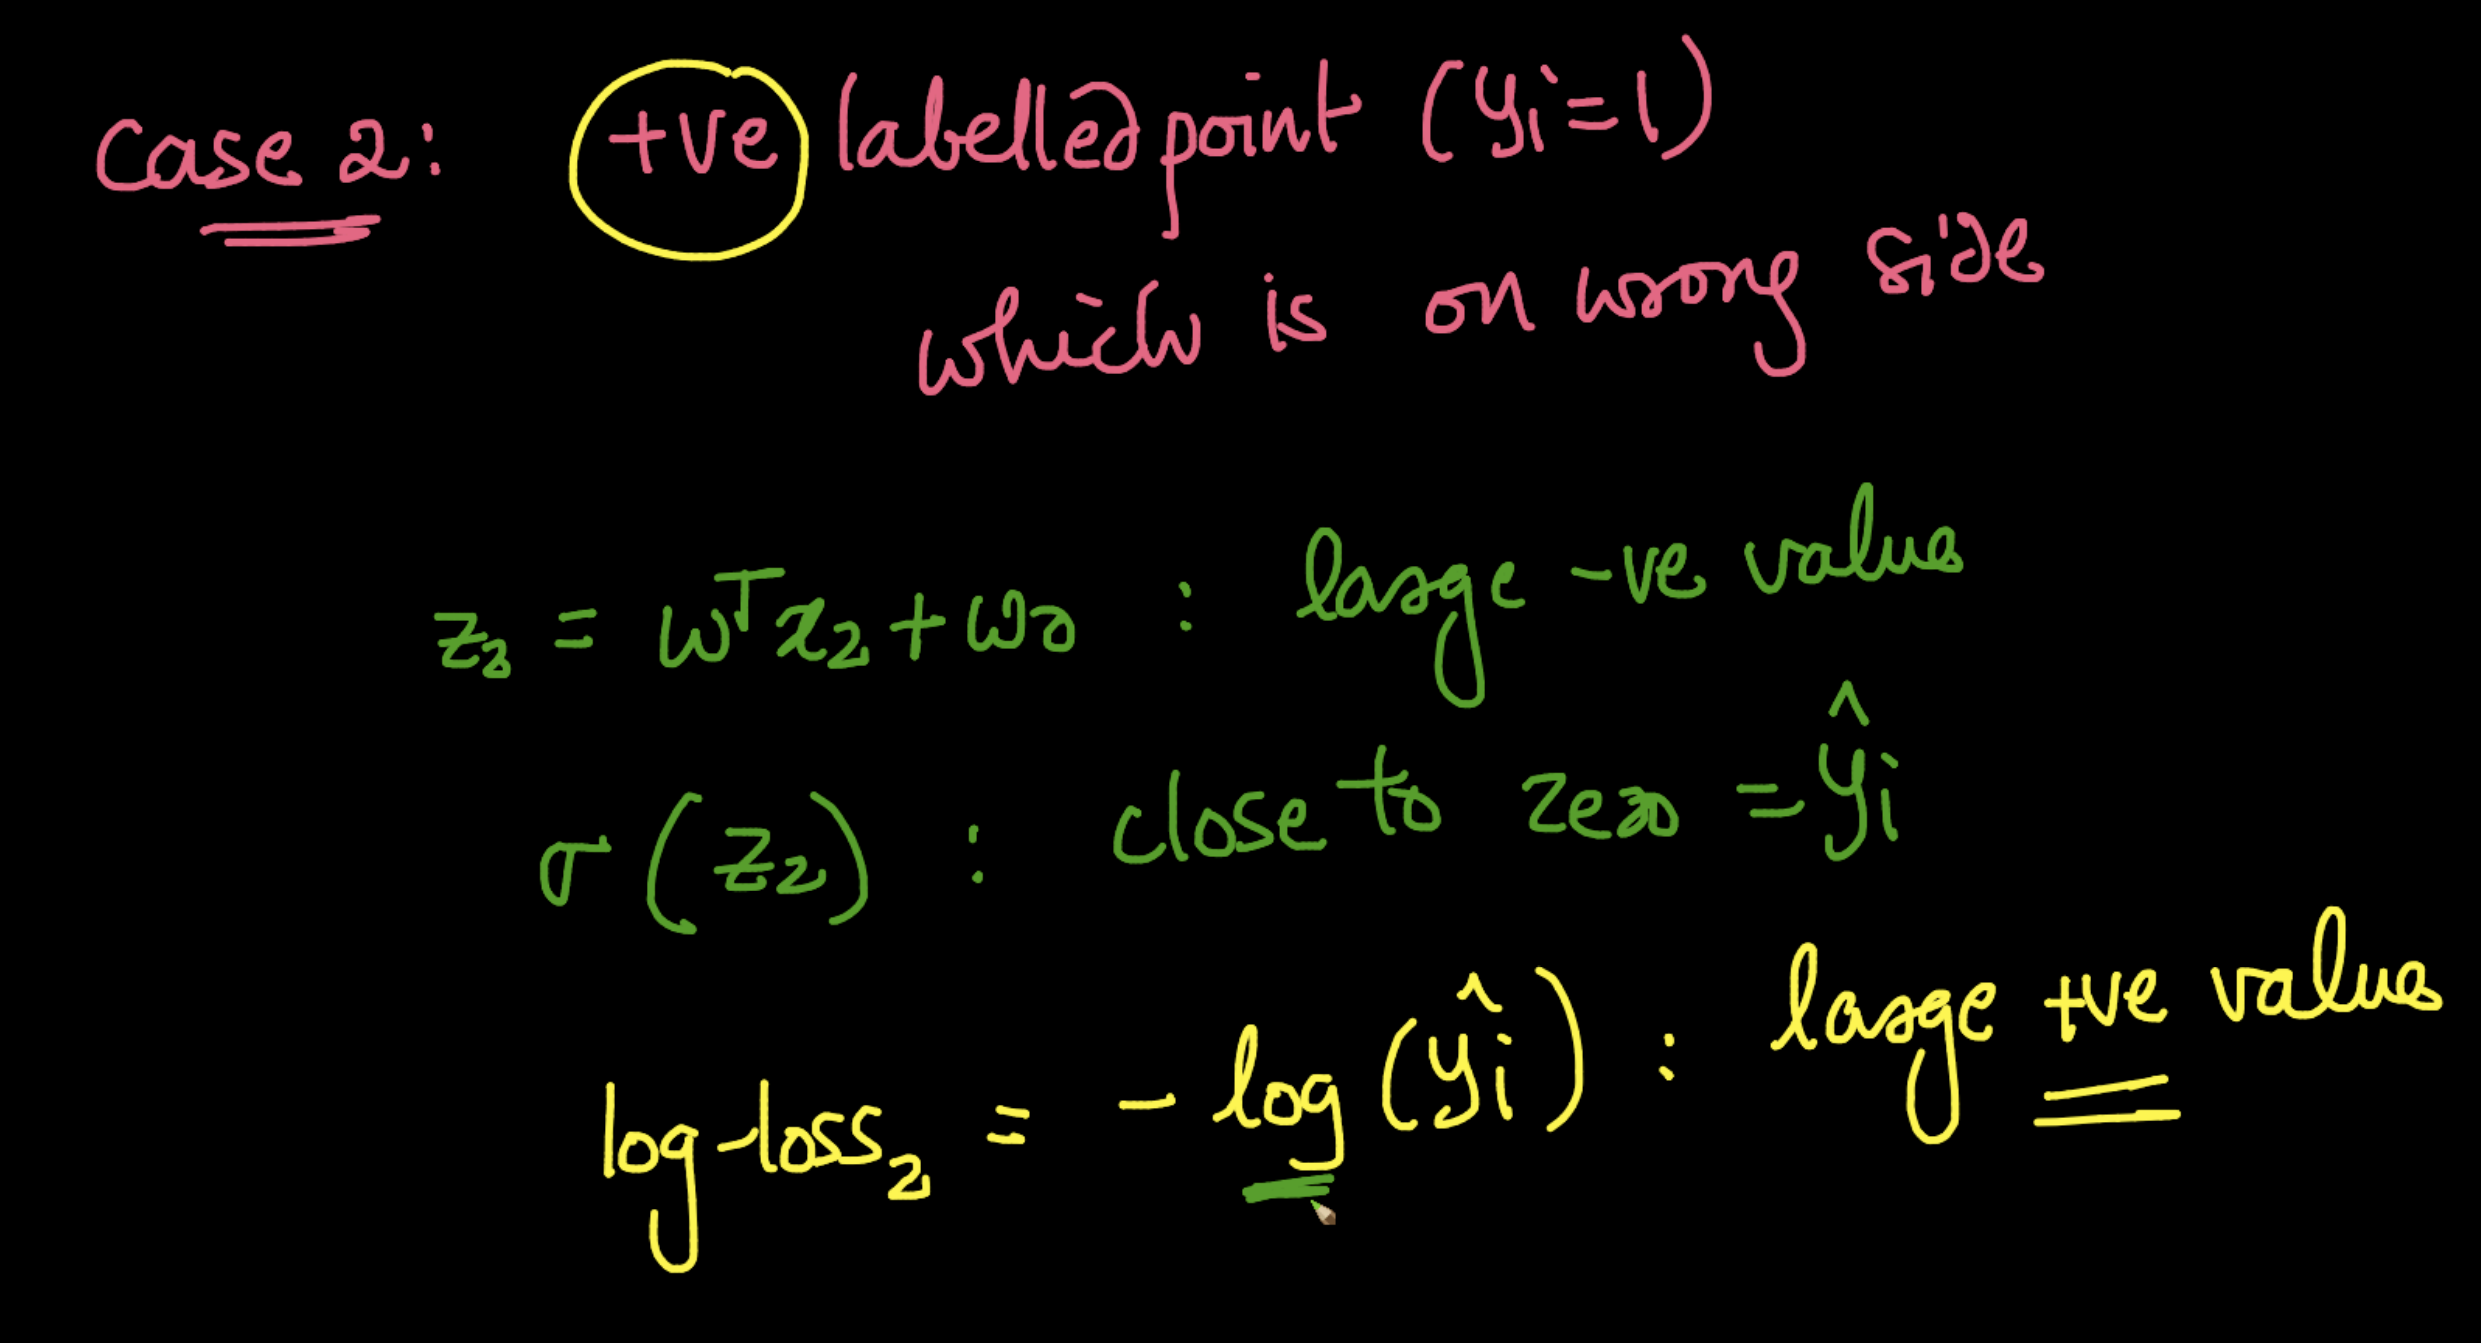

- Now since $z_i$ will be a large -ve value for the outlier, its $σ(z_i)$ will become very close to zero 

- Now since its a +ve outlier or $y=1$, our log-loss becomes
    - $log-loss= -log(y_î)$

- Recall when, $y_î$ tends to zero when $y=1$,  $-log(y_î)$ is a very large +ve value 

- Making this outlier, to have an impact on the weights of the model/hyperplane

- Causing the hyperplane to move towards the outlier



**Key Points**

> Outliers, in case of Logistic Regreesion may or may not have the effect on the result/model.

> Having Sigmoid function can reduce the effect of the outliers or even nulify them in some cases






# **Churn prediction Code Implementation**

Lets now discuss a real world scenario and see how logistic Regression model can help us 

Problem Statement:
- The dataset is in telecom domain, that contains some Customer features such as {last month bill, usage , Account Length} 
- and we want to predict if the customer will churn or not 

#### what does churn mean?
- Lets take an example, 
- supposedly we are a customer of Airtel 
- and for some reason we have switched to another telecom company,
- Then we have churned as a customer 

#### Why even predict customer churn or not ?
- The Telecom company, after predicting those customers who will churn
- can reach out to them and provide offers such that they do not churn

#### How is this a Classification problem ?
- We can see how the customer can either churn (1) or not Churn (0) based on the features of customer 


Importing libraries

In [ ]:
#Churn prediction in telecom.
import numpy as np 
import matplotlib.pyplot as plt 

Downloading the file

In [ ]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 9.33MB/s]


<font color='red'> Data Description </font>

1. "state",  2-letter code of the US state of customer residence

2. "account_length",  Number of months the customer has been with the current telco provider

3. "area_code", string="area_code_AAA" where AAA = 3 digit area code.

4. "intl_plan", (yes/no). The customer has international plan.

5. "vmail_plan", (yes/no). The customer has voice mail plan.

6. "vmail_messages", numerical. Number of voice-mail messages.

7. "day_mins", numerical. Total minutes of day calls.

8. "day_calls", numerical. Total minutes of day calls.

9. "day_charge", numerical. Total charge of day calls.

10. "eve_mins", numerical. Total minutes of evening calls.

11. "eve_calls", numerical. Total number of evening calls.

12. "eve_charge", numerical. Total charge of evening calls.

13. "night_mins", numerical. Total minutes of night calls.

14. "night_calls", numerical. Total number of night calls.

15. "night_charge", numerical. Total charge of night calls.

16. "intl_mins", numerical. Total minutes of international calls.

17. "intl_calls", numerical. Total number of international calls.

18. "intl_charge", numerical. Total charge of international calls

19. "customer_service_calls", numerical. Number of calls to customer service

20. "phone", string. 10 digit phone number

21. "churn", (yes/no). Customer churn - target variable.

In [ ]:
import pandas as pd 
churn = pd.read_csv("churn_logistic.csv")
churn.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Intl Plan  VMail Plan  Day Calls  ...  Eve Calls  \
0               1          0           1        110  ...         99   
1               1          0           1        123  ...        103   
2               0          0           0        114  ...        110   
3               2          1           0         71  ...         88   
4               3          1           0        113  ...        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone Churn  
0       415  382-4657     0  
1       415  371-7191     0  
2       415  358-1921     0  
3       408  375-9999     0  
4       415  330-6626     0  

[5 rows x 21 columns]

Lets see how many samples does churn data has 

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

- Notice we have 5700 samples which are quite enough for training the  logisitic Regression model. 

Now, lets focus on ```Churn``` column which is our Y  

In [ ]:
churn["Churn"].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

- We see how the data is balanced since we have equal number of samples in both the customers who churned or did not churned

Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA 

- But since we have already studied EDA, we will do a quick  code walktrhough of it 

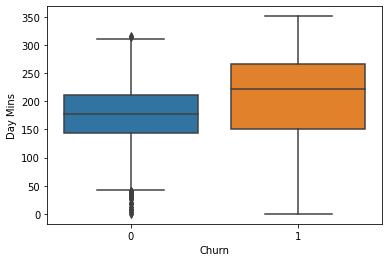

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='Day Mins', data = churn)

- Notice how we use feature ```Day Mins``` to check if it is significant or not 

#### What can we see from the boxplot ?
- The churned custmors have a higher median for  Day Mins than not churned customers which means:
- Customer who spent more time calling in a day tend to churn 

this shows, ```Days Mins``` is an important feature 



Now, let's see if there is any other feature which has collinearity with ```Days Mins```

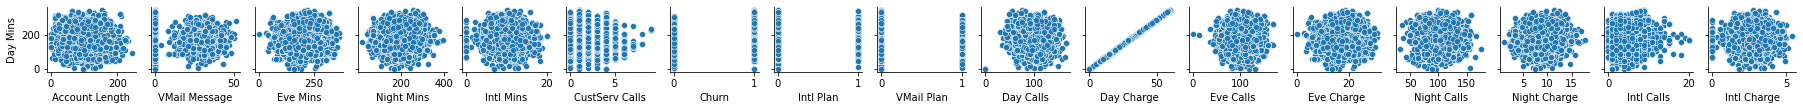

In [ ]:
sns.pairplot(data=churn, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=1.5, aspect=1)
plt.show()

#### Can we say which feature is highly correlated with ```Days Mins``` ?
- Day Charge is highly correlated 
- meaning as Day Mins so does the  Day Charge 
- Hence we will just drop either one of them 

- notice how we are still doing the same exact things as we did in Linear Regression. 
- Since we are still training a linear model if we recall log-odds

Now lets see another feature ``` Account Length``` 

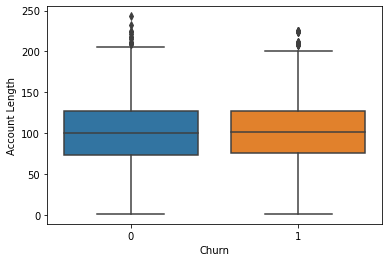

In [ ]:
sns.boxplot(x = 'Churn', y= 'Account Length', data = churn)

#### Does the Account Length feature relevant ?
- If we see median for both, its quite similar
- Hence this feature does not have any signficance and can be dropped 




We are skipping the rest of the EDA but Students should take it as an exercise and perform more EDA to find out which features has some relation with target variable

#### What all EDA can do ?
- Remove useless Features 
- Remove highly Correlated Features 


We are now taking a few of the Features which might not be the best ones to choose for this problem statement.

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

#### Train test Split

- Splitting the data into training and testing as done in Linear Regression 

#### But what should be the ratios for splitting ?
- 80% is training data and 20% is test 

- We know the importance of Validation data, hence we split the 80% data as 60% and 20%, where
- 60% is Training data and 20 % is cross Validation data  

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(3420, 5)

Now, lets do column standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# print X_train
X_train

array([[-1.3401872 , -2.29116555, -0.52179332,  2.19011647, -0.5352414 ],
       [-0.37273287, -1.19169576, -1.15081453, -0.45659672, -0.5352414 ],
       [ 1.54289097,  0.33984637, -0.52179332, -0.45659672, -0.5352414 ],
       ...,
       [ 0.83417443,  0.52694913, -1.15081453, -0.45659672, -0.5352414 ],
       [-0.58807985, -0.12887496,  1.3652703 , -0.45659672, -0.5352414 ],
       [-0.45469329,  1.42195611,  0.73624909,  2.19011647,  1.68255781]])

 [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit Learn

- If we see L2 regularization is done by default 
- We see there is no Regularization Parameter λ 
#### How to vary Regularization Parameter λ ?
- There is a C parameter which is Inverse of λ 

There are other parameters which we will learn in later lectures but as for now we will be focusing only on these parameters.

Lets start with implementation of Logistic Regression




When implementing ```ElasticNet``` Regularization, 
- Sklearn has 11_ratio hyperparameter which has a range $0 ≤ $ l1_ratio $ ≤ 1$

Setting l1_ratio=0 is 
- equivalent to using penalty='l2'

while setting l1_ratio=1 is 
- equivalent to using penalty='l1'. 

For 0 < l1_ratio <1, 
- the penalty is a combination of L1 and L2.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

Now, let's see the weights of each feature except $w_0$ 
- Since $w_0 $ is also called Intercept of the model





In [ ]:
model.coef_

array([[ 0.78670623,  0.31093629,  0.94086792,  0.8692631 , -0.31783734]])

- observe how the weight of feature 3  i.e ```CustServ Calls``` (CustomerService Call) is highest

#### What can we say about ```CustServ Calls``` ? 
- Since we have already Standardize the data, the weight for this feature is a large positive value 
- that means customers having more "CustServ Calls" will probably churn more

Next highest weight is for Feature 4 ```Intl Plan``` which is International Plan
#### What can we say about it ?
- Meaning if a Customer does a lot of International Plans, the customer will churn, 

Showing that there is issue regarding the International plans of the company 

We also have an intercept weight 

In [ ]:
model.intercept_

array([0.05338236])

Checking acuracy score in train and  validation data

In [ ]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.7564327485380117, Val Accuracy:0.7578947368421053


**Observe**

How train and validation Accuracy of the logistic Model are quite low, 


Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

The code is similar to the code explained in Linear Regression 


- First we initialize the values for $λ$
- then for each value of $λ$
    - Then create a pipeline for standarization scaling and Logistic Regression model 
    - Then fit the train data to the model
    - And get the scores of the train and validation data set
    

NOTE: the default scoring metric is Accuracy 





In [ ]:
len(val_scores)

120

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

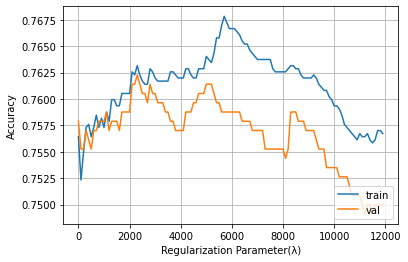

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



- We see how Validation increases to a peak and then decreases



- Notice as Regularization is increasing, the Accuracy is keep on decreasing since model is moving towards Underfit






#### What can we see from the increased value of Regularization Parameter?

- We see how the model starts underfitting and performing poorly on the train and validation data

- Now we pick that $λ$ we are getting the maximum validation score

In [ ]:
np.argmax(val_scores)

23

In [ ]:
val_scores[23]

0.762280701754386

- We observe that validation score is maximum of 76.2% when index = 23, thus our $λ$ best becomes:

In [ ]:
l_best = 0.01 * 23 * 100

- We do this since we are stepping 100 in each iteration 

Lets train model with best λ

In [ ]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.043478260869565216))])

Now test this best model on our test data

In [ ]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.7657894736842106


NOTE: The scaler in the pipepline performs scaling first and then the logistic Regression,
- the scaler uses training data mean and standard deviation when model is in training 
- And continues using it for Validation and Test data since we are not using ```.fit()``` function instead just a ```.score()``` function 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = scaled_lr.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[435, 145],
       [122, 438]])

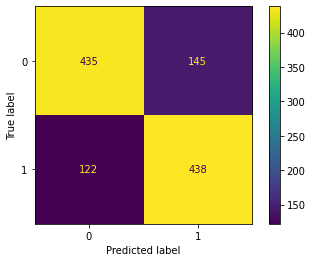

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()